Content: 
Why we wanna do this data? 

what are we trying to find out? 
-Find which data is the best predictor for heart diseases 


## 1. Import libraries required

In [81]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import os
import pandas_profiling as pp
sb.set() # set the default Seaborn style for graphics
sb.set_style("darkgrid")
sb.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})


## 2. Checking of Data 

In [82]:
cardio = pd.read_csv('cardio_train.csv', sep=';')
cardio.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [83]:
print("Data type : ", type(cardio))
print("Data dims : ", cardio.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (70000, 13)


In [84]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [85]:
cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## 3. Processing Data 

In [86]:
cardio_data = cardio.copy()

In [87]:
# Drop id column as it doesnt help 
cardio_data = cardio_data.drop(columns='id')

# Convert age into years
cardio_data['age'] = cardio_data['age']//365.25

# Combine age & weight into BMI
cardio_data['bmi'] = cardio_data["weight"] / (cardio_data["height"]/100)**2
cardio_data = cardio_data.drop(columns=['weight', 'height'])

In [88]:
cardio_data.head(10)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.0,2,110,80,1,1,0,0,1,0,21.967120
1,55.0,1,140,90,3,1,0,0,1,1,34.927679
2,51.0,1,130,70,3,1,0,0,0,1,23.507805
3,48.0,2,150,100,1,1,0,0,1,1,28.710479
4,47.0,1,100,60,1,1,0,0,0,0,23.011177
5,59.0,1,120,80,2,2,0,0,0,0,29.384676
6,60.0,1,130,80,3,1,0,0,1,0,37.729725
7,61.0,2,130,90,3,3,0,0,1,1,29.983588
8,48.0,1,110,70,1,1,0,0,1,0,28.440955
9,54.0,1,110,60,1,1,0,0,0,0,25.282570


In [67]:
cardio_data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.803257,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.762462,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
# Convert categorical variables into “category” data type
cat_attribs = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

# Create a list that contains numerical attributes
num_attribs = ['age', 'bmi', 'ap_hi', 'ap_lo']

# Covert the data type of categorical attributes into "category"
for cat_attrib in cat_attribs:                                # iterate over each categorical attribute
  cardio_data[cat_attrib] = cardio_data[cat_attrib].astype('category')  # convert data type

cardio_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,52.803257,6.762462,29.000000,48.000000,53.000000,58.000000,64.000000
ap_hi,70000.0,128.817286,154.011419,-150.000000,120.000000,120.000000,140.000000,16020.000000
ap_lo,70000.0,96.630414,188.472530,-70.000000,80.000000,80.000000,90.000000,11000.000000
bmi,70000.0,27.556513,6.091511,3.471784,23.875115,26.374068,30.222222,298.666667


In [90]:
pp.ProfileReport(cardio_data, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Could see that ap_lo and ap_hi is highly skewed with samples with unrealistic values lowest ap_hi = -150 lowest ap_low = -70 highest ap_hi = 16020 highest ap_lo = 11000

The number of training examples have ap_hi and ap_lo outside the range of 40-200mmHg


<AxesSubplot:xlabel='ap_hi', ylabel='Count'>

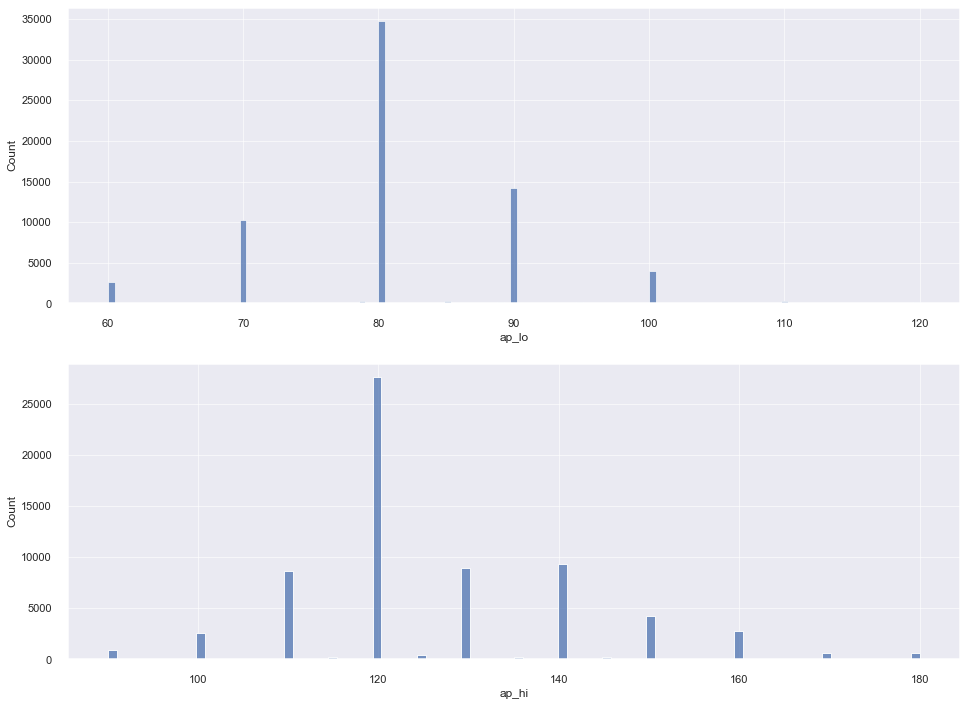

In [100]:
# Extract Systolic (ap_hi) and Diastolic (ap_lo) blood pressure
ap_hi = cardio_data['ap_hi']
ap_lo = cardio_data['ap_lo']

# Print number of unusual training examples
print("The number of training examples have ap_hi and ap_lo outside the range of 40-200mmHg")
cardio_data['cardio'].loc[(ap_hi < 90) | (ap_hi > 220) | (ap_lo < 60) | (ap_lo > 120)].count()

#filter out bad data
filter_max = ((cardio_data["ap_hi"]>220) | (cardio_data["ap_lo"]>120))
filter_min = ((cardio_data["ap_hi"]<90) | (cardio_data["ap_lo"]<60))
cardio_data = cardio_data[~filter_max]
cardio_data = cardio_data[~filter_min]
len(cardio_data)

fig, axs = plt.subplots(2, figsize=(16, 12))
sb.histplot(data = cardio_data["ap_lo"], ax = axs[0])
sb.histplot(data = cardio_data["ap_hi"], ax = axs[1])

In [101]:
pp.ProfileReport(cardio_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

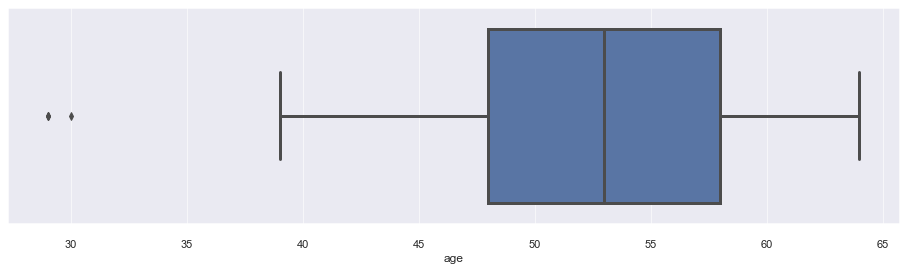

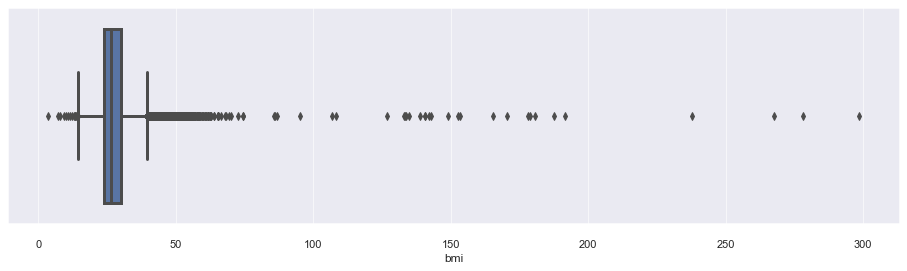

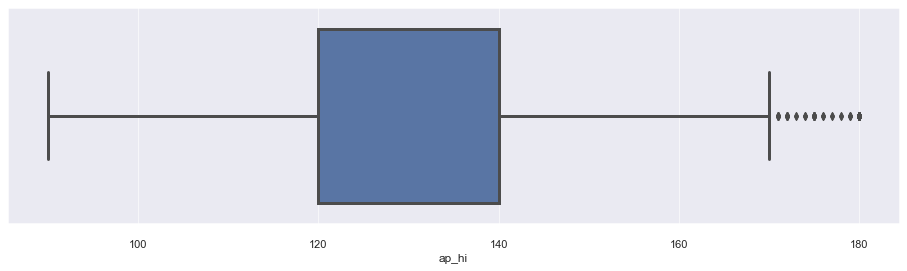

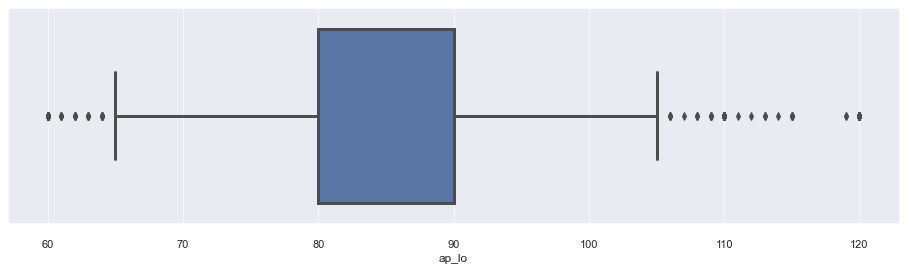

In [102]:
# Extract numerical attributes from the dataset
numeric_data = pd.DataFrame(cardio_data[num_attribs])

# Boxplot of the numeric data
for var in numeric_data:                                      # iterate over numerical attributes
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,4))  # setup the frame of the plot
  sb.boxplot(data=cardio_data, x=var, orient='h')                  # box plot

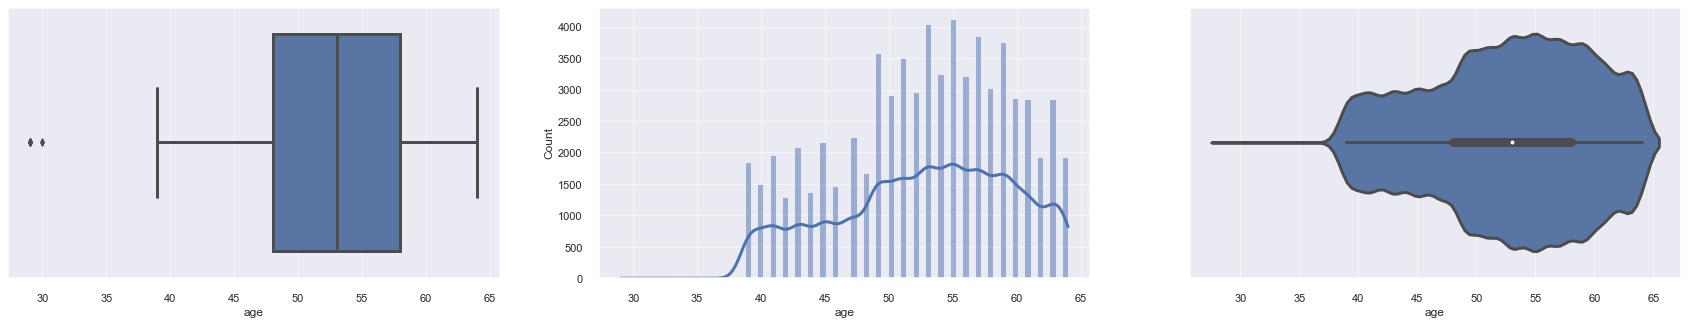

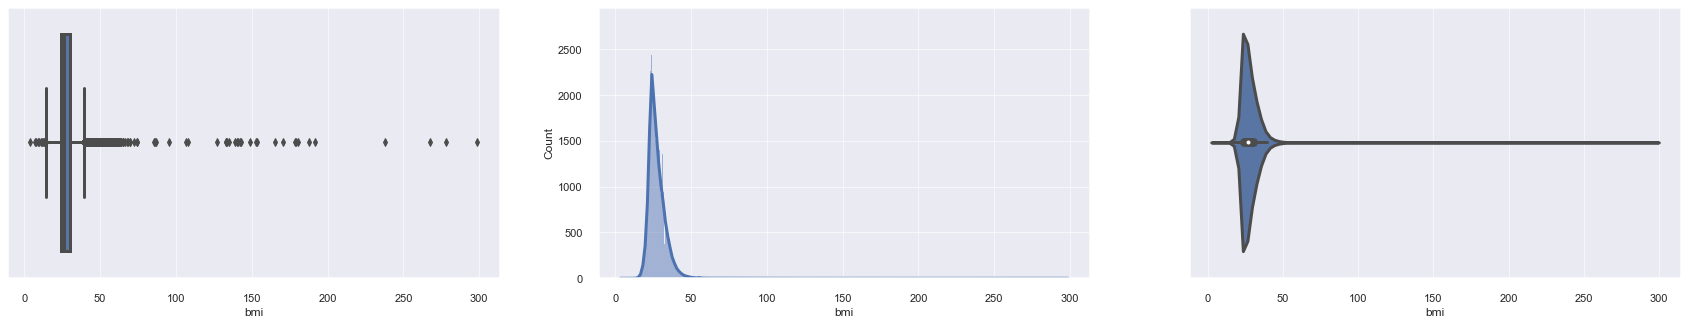

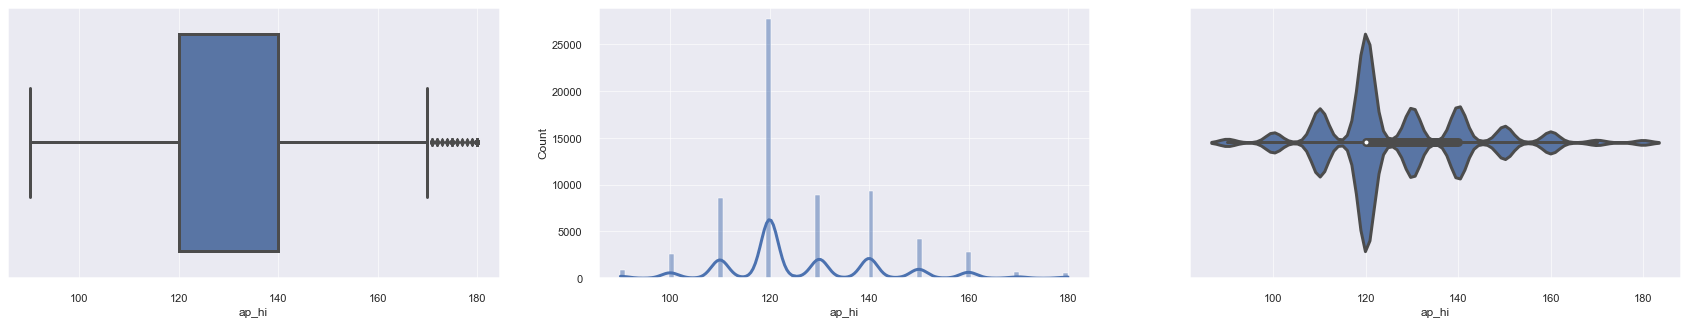

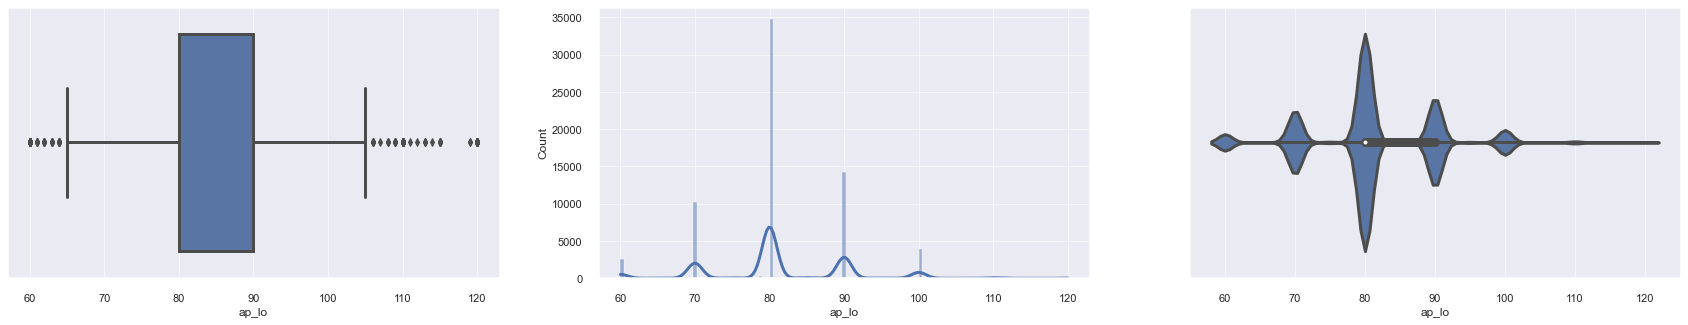

In [103]:
# Univariate analysis
for num_attrib in num_attribs:                                     # iterate over numerical attributes
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,5))       # setup the frame of the plot
  sb.boxplot(data=cardio_data, x=num_attrib, orient='h', ax=axes[0])    # box plot
  sb.histplot(data=cardio_data[num_attrib], kde=True, ax=axes[1])       # histogram with Kernel Density Estimators (KDE)
  sb.violinplot(data=cardio_data, x=num_attrib, orient='h', ax=axes[2]) # violin plot

*do describption of the plots above 

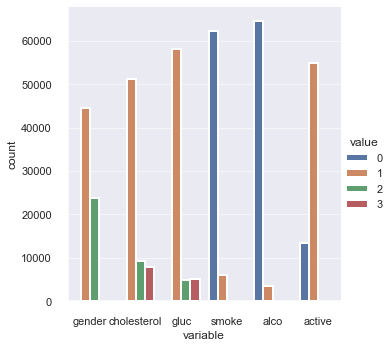

In [108]:
# Presence and absence of CVDs over each categorical attribute
cat_df = pd.melt(cardio_data, value_vars=cat_attribs[:-1])             # dataframe of categorical attributes
sb.catplot(x='variable', hue='value', data=cat_df, kind='count')  # categorical plot

## 4. Exploratory Analysis 


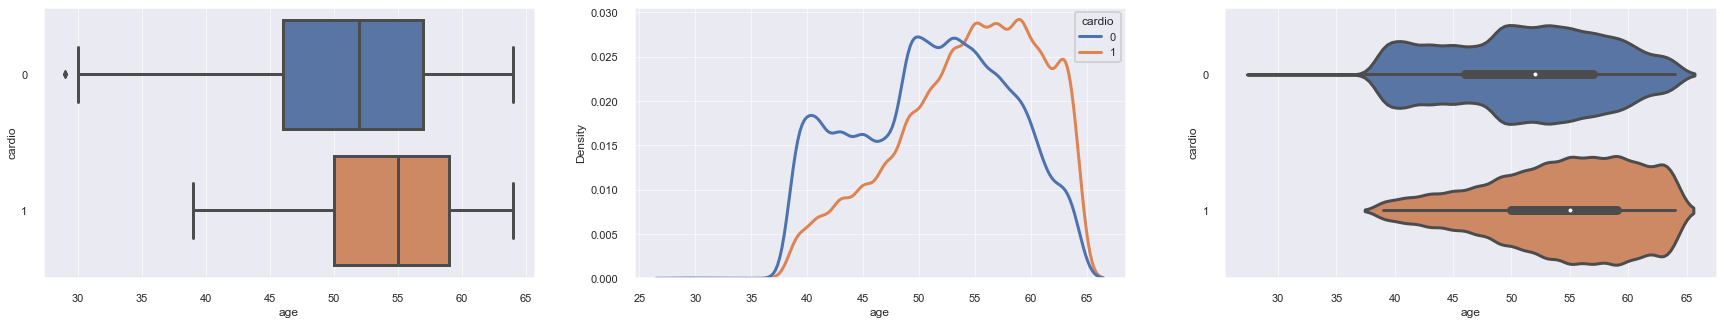

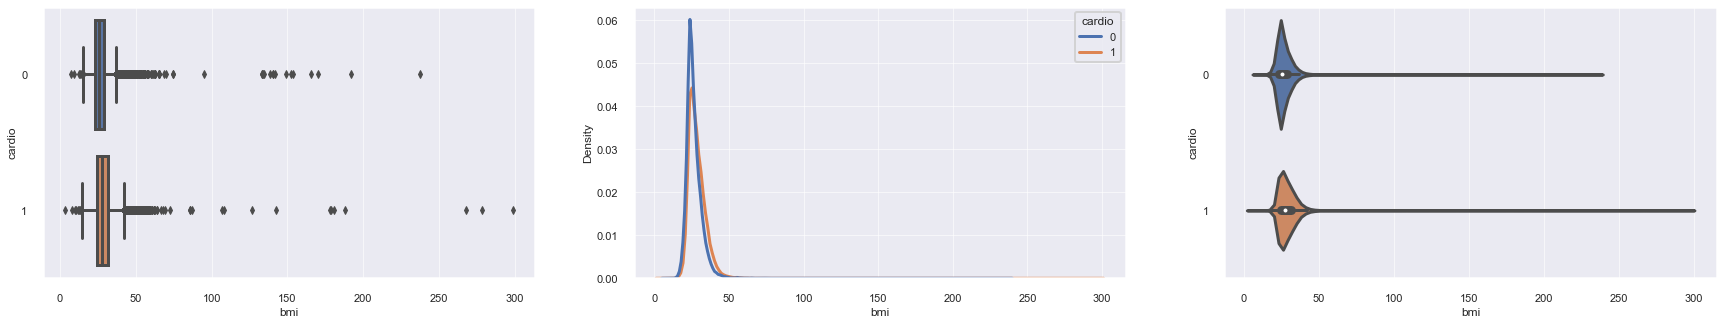

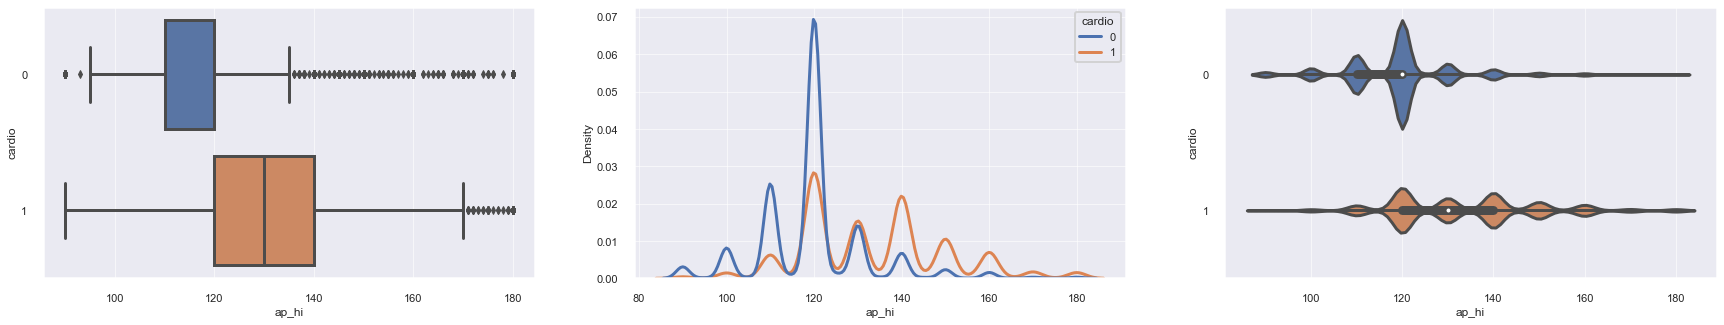

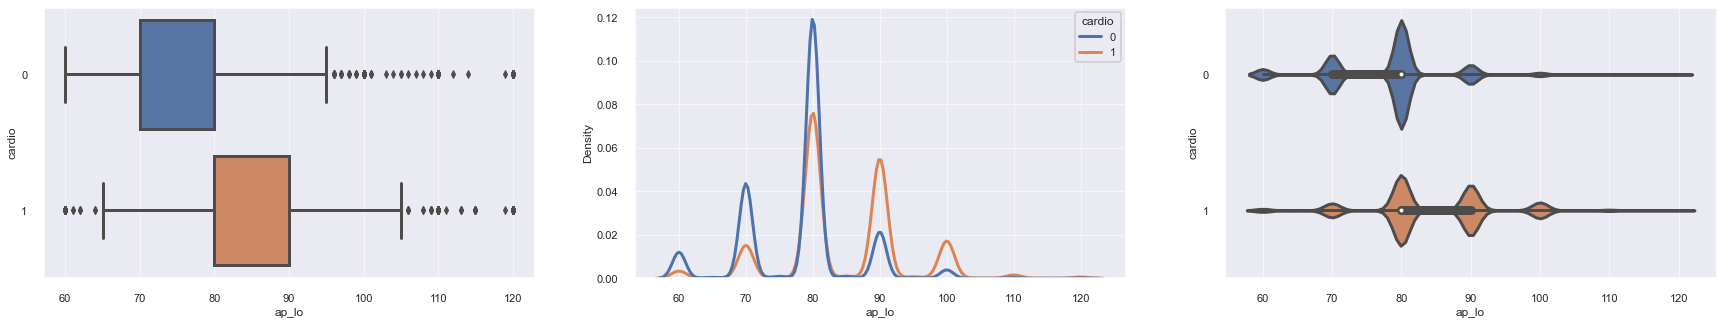

In [109]:
# Bivariate analysis with respect to target class
for num_attrib in num_attribs:                                                           # iterate over numerical attributes
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,5))                             # setup the frame of the plot
  sb.boxplot(data=cardio_data, x=num_attrib, y='cardio', orient='horizontal', ax=axes[0])     # box plot
  sb.kdeplot(data=cardio_data, x=num_attrib, hue='cardio', ax=axes[1])                        # kde plot
  sb.violinplot(data=cardio_data, x=num_attrib, y='cardio', orient='horizontal', ax=axes[2])  # violin plot

<AxesSubplot:xlabel='age', ylabel='count'>

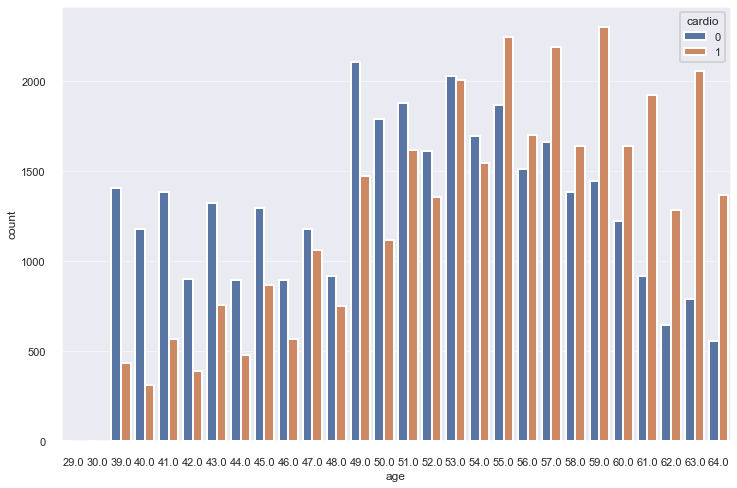

In [110]:
# Count plot of age over target class
fig = plt.subplots(figsize=(12,8))                # setup the frame of the plot
sb.countplot(x='age', hue='cardio', data=cardio_data)  # count plot

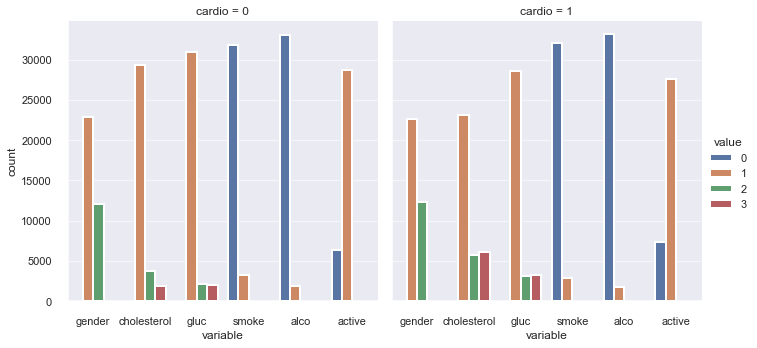

In [111]:
# Presence and absence of CVDs over each categorical attribute
cat_df = pd.melt(cardio, id_vars=['cardio'], value_vars=cat_attribs[:-1])       # dataframe of categorical attributes
sb.catplot(x='variable', hue='value', col='cardio', data=cat_df, kind='count')  # categorical plot